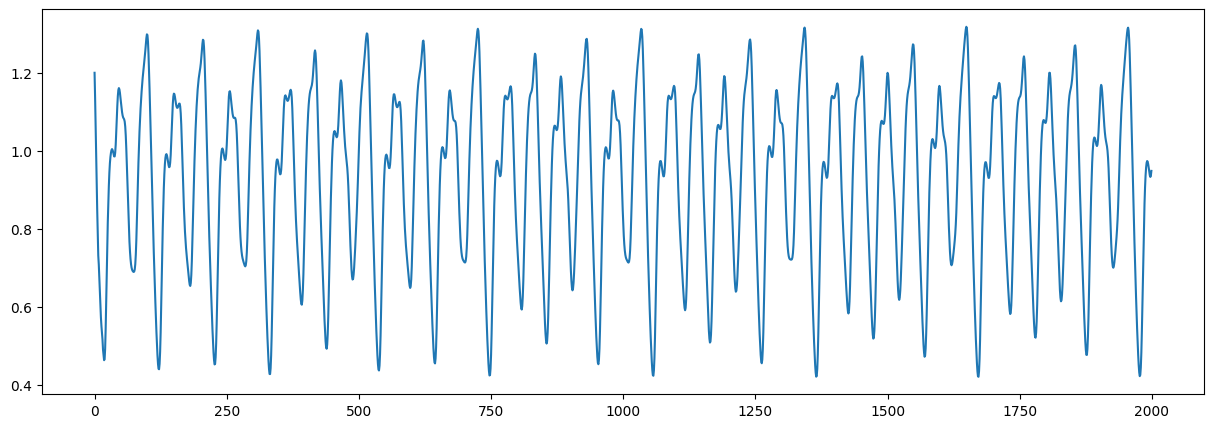

In [1]:
from reservoirpy.datasets import mackey_glass
import pylab as plt

time_steps = 2000
time_series = mackey_glass(time_steps)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(time_series)
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from lstm import make_windows

in_size = 16  # (4, 8, 16)
out_size = 70  # (1, 70, 140)
X, Y = make_windows(time_series, in_size=in_size, out_size=out_size)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

In [3]:
import numpy as np
from reservoirpy.nodes import Reservoir, Ridge

reservoir = Reservoir(units=1000, lr=0.3, sr=0.95)
readout = Ridge(ridge=1e-5)

X_train_feat = np.array([reservoir.run(x)[-1] for x in X_train])
readout = readout.fit(X_train_feat, Y_train)

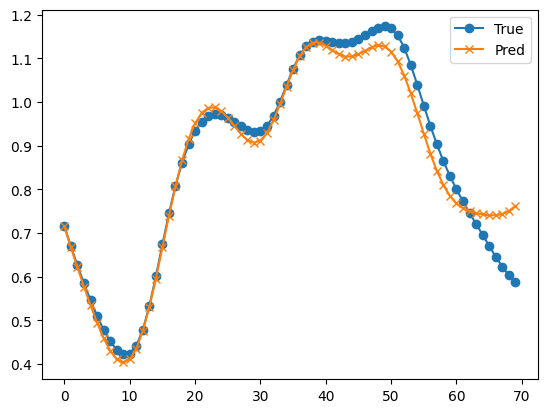

In [4]:
X_test_feat  = np.array([reservoir.run(x)[-1] for x in X_test])
pred_test = readout.run(X_test_feat)

idx = 0
true_horizon = Y_test[idx]
pred_horizon = pred_test[idx]

fig, ax = plt.subplots()
ax.plot(np.arange(out_size), true_horizon, marker="o", label="True")
ax.plot(np.arange(out_size), pred_horizon, marker="x", label="Pred")
ax.legend()
plt.show()